In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from collections import defaultdict
from IPython import display
%matplotlib inline

df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [3]:
#getting description of any column from dataframe usin schema file

def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    col_name = column_name
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    #print("Column Name: {} \nDescription: {}\n".format(col_name, desc))
    return desc

# Question 2: What does data suggest about bootcamp grads in terms of job placement and salary?

In [4]:
get_description('TimeAfterBootcamp')

'You indicated previously that you went through a developer “bootcamp.” How long did it take you to get a full-time job as a developer after graduating?'

In [5]:
df['TimeAfterBootcamp']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                     NaN
11                                                     NaN
12                                                     NaN
13                                                     NaN
14                                                     NaN
15                                                     NaN
16       I already had a job as a developer when I star.

In [6]:
#subset of bootcamp grads

bootcamp_grads = df[df['TimeAfterBootcamp'].isnull() == False]
non_bootcamp_grads = df[df['TimeAfterBootcamp'].isnull() == True]

In [7]:
bootcamp_grads.shape

(2602, 154)

### Finding ratio of Male and Females in Bootcamp grads and Non-Bootcamp grads

In [8]:
bootcamp_grads['Gender'].value_counts()/ (bootcamp_grads.shape[0] - sum(bootcamp_grads['Gender'].isnull()))

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Female; Gender non-conforming                              0.001383
Male; Gender non-conforming                                0.001383
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Transgender                                                0.000922
Male; Female                                               0.000922
Transgender; Gender non-conforming                         0.000922
Female; Transgender; Gender non-conforming                 0.000922
Male; Transgender                                          0.000922
Male; Gender non-conforming; Other                         0.000461
Female; Gender non-conforming; Other            

In [9]:
non_bootcamp_grads['Gender'].value_counts()/ (non_bootcamp_grads.shape[0] - sum(non_bootcamp_grads['Gender'].isnull()))

Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Transgender; Gender non-conforming                         0.000395
Male; Female                                               0.000395
Male; Transgender                                          0.000274
Female; Transgender; Gender non-conforming                 0.000182
Male; Female; Transgender; Gender non-conforming

### Analysing the time taken by person to find a job after completing the bootcamp

In [10]:
bootcamp_grads['TimeAfterBootcamp'].value_counts()/ (bootcamp_grads.shape[0])

I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

### Analyzing the degree graduates and non-graduates have

In [11]:
bootcamp_grads['FormalEducation'].value_counts()/ (bootcamp_grads.shape[0] - sum(bootcamp_grads['FormalEducation'].isnull()))

Bachelor's degree                                                    0.475019
Master's degree                                                      0.225211
Some college/university study without earning a bachelor's degree    0.162567
Secondary school                                                     0.069562
Doctoral degree                                                      0.022291
Professional degree                                                  0.016141
I prefer not to answer                                               0.011914
Primary/elementary school                                            0.009224
I never completed any formal education                               0.008071
Name: FormalEducation, dtype: float64

In [12]:
non_bootcamp_grads['FormalEducation'].value_counts()/ (non_bootcamp_grads.shape[0] - sum(non_bootcamp_grads['FormalEducation'].isnull()))

Bachelor's degree                                                    0.417565
Master's degree                                                      0.216335
Some college/university study without earning a bachelor's degree    0.157942
Secondary school                                                     0.117381
Doctoral degree                                                      0.025620
I prefer not to answer                                               0.022095
Primary/elementary school                                            0.020967
Professional degree                                                  0.013794
I never completed any formal education                               0.008301
Name: FormalEducation, dtype: float64

### Analyzing salary distribution of bottcamp grads

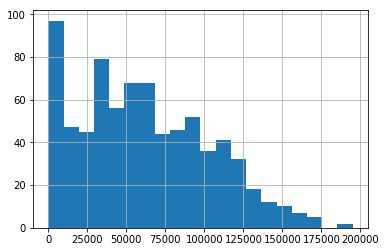

In [13]:
bootcamp_grads['Salary'].hist(bins=20)

# From the above analysis it is difficult to analyze the salary and job placements based on bootcamp. It shows that multiple factors affects the job placement and salary of an individual